In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import zipfile

2025-04-19 20:53:57.301834: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-19 20:53:58.099939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745096038.349333    2380 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745096038.427133    2380 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745096039.058234    2380 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("archive")

data_path = "archive/Faulty_solar_panel"
IMG_SIZE = (64, 64)
categories = sorted(os.listdir(data_path))
label_map = {cat: idx for idx, cat in enumerate(categories)}

print("Class names:", categories)

# Load images and labels
def load_images_from_directory(base_path, label_map, img_size=(64, 64)):
    images, labels = [], []
    for category in label_map:
        folder = os.path.join(base_path, category)
        for file in os.listdir(folder):
            try:
                img = Image.open(os.path.join(folder, file)).convert('RGB').resize(img_size)
                images.append(np.array(img))
                labels.append(label_map[category])
            except:
                continue
    return np.array(images), np.array(labels)

X, y = load_images_from_directory(data_path, label_map)
X = X.astype('float32') / 255.0
y_cat = to_categorical(y, num_classes=6)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y)


Class names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [3]:
# 2. Define CNN model
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
# 3. Train CNN on original data (no augmentation)
cnn_plain = build_cnn()
history = cnn_plain.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))


/home/ubuntu/miniconda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-19 20:54:41.378842: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.2527 - loss: 5.0323 - val_accuracy: 0.2874 - val_loss: 1.7844
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.3493 - loss: 2.6164 - val_accuracy: 0.2184 - val_loss: 2.6898
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4053 - loss: 1.9184 - val_accuracy: 0.3218 - val_loss: 4.1258
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4500 - loss: 1.6424 - val_accuracy: 0.2759 - val_loss: 4.9852
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4486 - loss: 1.5716 - val_accuracy: 0.3391 - val_loss: 4.0136
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4989 - loss: 1.3057 - val_accuracy: 0.3448 - val_loss: 3.5161
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5529 - loss: 1.1909 - val_accuracy: 0.2184 - val_loss: 4.9269
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5819 - loss: 1.1060 - 

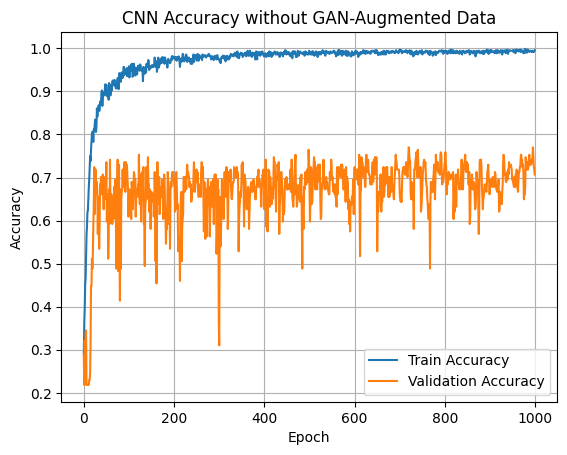

In [5]:
# 4. Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy without GAN-Augmented Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()